In [1]:
import pandas as pd
import glob
import os

# ค้นหาไฟล์ .xlsx ทั้งหมดในโฟลเดอร์ที่กำหนด
folder_path = os.path.join(os.getcwd(), 'model', 'Data')  # ปรับ path ตามต้องการ
files_xlsx = glob.glob(os.path.join(folder_path, '*1d.xlsx'))

# ตรวจสอบว่าเจอไฟล์หรือไม่
if not files_xlsx:
    print("ไม่พบไฟล์ Excel ในโฟลเดอร์ที่กำหนด")
else:
    # อ่านและรวมข้อมูลจากทุกไฟล์
    df_combined = pd.concat([pd.read_excel(file) for file in files_xlsx], ignore_index=True)

    # บันทึกเป็นไฟล์ CSV
    output_csv = os.path.join(folder_path, 'combined_data.csv')
    df_combined.to_csv(output_csv, index=False, encoding='utf-8-sig')

    print(f"บันทึกไฟล์ CSV เรียบร้อยที่: {output_csv}")


บันทึกไฟล์ CSV เรียบร้อยที่: c:\Users\snpdp\pm2.5-Forecast-Dashboard\model\Data\combined_data.csv


In [2]:
df_combined.head()

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,temperature,pm_2_5_sp
0,0,2021-08-16 07:00:00,Asia/Bangkok,97.712066,6.419446,5.979462,24.220945,NaN
1,1,2021-08-17 07:00:00,Asia/Bangkok,95.922874,9.716751,9.142292,24.807743,NaN
2,2,2021-08-18 07:00:00,Asia/Bangkok,87.291672,8.607477,7.901869,26.346601,NaN
3,3,2021-08-19 07:00:00,Asia/Bangkok,86.124131,11.832133,10.989553,27.062054,NaN
4,4,2021-08-20 07:00:00,Asia/Bangkok,89.532874,8.965864,8.201077,26.208938,NaN


In [3]:
df_combined['timezone'].unique()

array(['Asia/Bangkok'], dtype=object)

In [4]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27450 entries, 0 to 27449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   27450 non-null  int64         
 1   timestamp    27450 non-null  datetime64[ns]
 2   timezone     27450 non-null  object        
 3   humidity     26748 non-null  float64       
 4   pm_10        20312 non-null  float64       
 5   pm_2_5       27450 non-null  float64       
 6   temperature  26815 non-null  float64       
 7   pm_2_5_sp    10454 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.7+ MB


In [2]:
df_combined = df_combined.drop(columns=["Unnamed: 0", "timezone", "pm_10", "pm_2_5_sp"])


In [6]:
df_combined

,timestamp,humidity,pm_2_5,temperature
0,2021-08-16 07:00:00.000,97.712066,5.979462,24.220945
1,2021-08-17 07:00:00.000,95.922874,9.142292,24.807743
2,2021-08-18 07:00:00.000,87.291672,7.901869,26.346601
3,2021-08-19 07:00:00.000,86.124131,10.989553,27.062054
4,2021-08-20 07:00:00.000,89.532874,8.201077,26.208938
...,...,...,...,...
27445,2025-02-08 07:00:00.000,97.108096,25.684798,26.560363
27446,2025-02-09 07:00:00.000,96.687594,20.455970,26.746786
27447,2025-02-10 07:00:00.000,97.279796,25.261628,26.531510
27448,2025-02-11 07:00:00.000,96.373096,27.361650,26.441329


In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27450 entries, 0 to 27449
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    27450 non-null  datetime64[ns]
 1   humidity     26748 non-null  float64       
 2   pm_2_5       27450 non-null  float64       
 3   temperature  26815 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 857.9 KB


In [7]:
# แทนค่า NaN ใน humidity และ temperature ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
df_combined["humidity"] = df_combined["humidity"].fillna(df_combined["humidity"].mean())
df_combined["temperature"] = df_combined["temperature"].fillna(df_combined["temperature"].mean())


In [12]:
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27450 entries, 0 to 27449
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    27450 non-null  datetime64[ns]
 1   humidity     27450 non-null  float64       
 2   pm_2_5       27450 non-null  float64       
 3   temperature  27450 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 857.9 KB
None


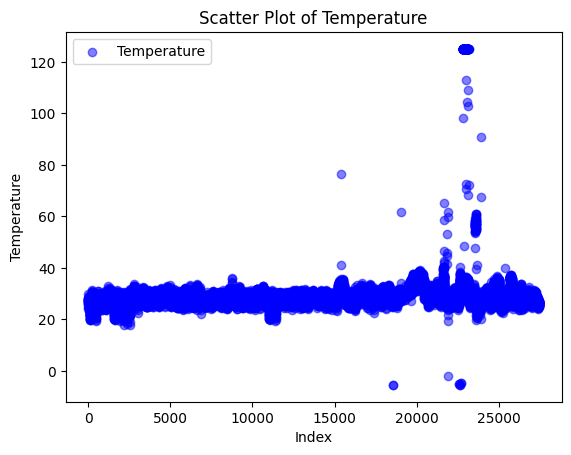

In [13]:
import matplotlib.pyplot as plt

# ใช้ index เป็นแกน X
x = df_combined.index  
y = df_combined["temperature"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="Temperature")
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.title("Scatter Plot of Temperature")
plt.legend()
plt.show()



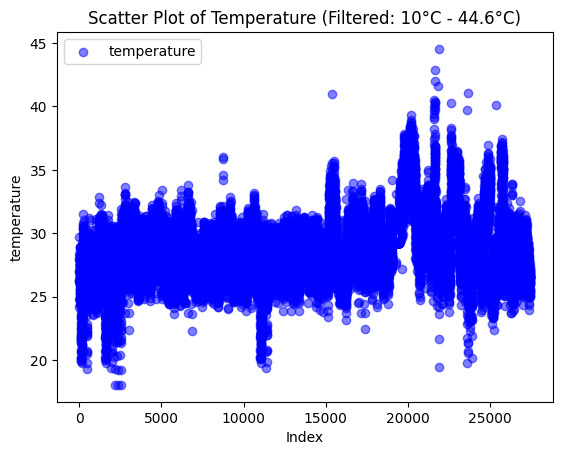

In [14]:
# กรองเฉพาะค่าที่ temperature อยู่ในช่วง 10 - 44.6 องศา
df_filtered = df_combined[(df_combined["temperature"] >= 10) & (df_combined["temperature"] < 44.6)]

# ใช้ index เป็นแกน X
x = df_filtered.index  
y = df_filtered["temperature"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="temperature")
plt.xlabel("Index")
plt.ylabel("temperature")
plt.title("Scatter Plot of Temperature (Filtered: 10°C - 44.6°C)")
plt.legend()
plt.show()


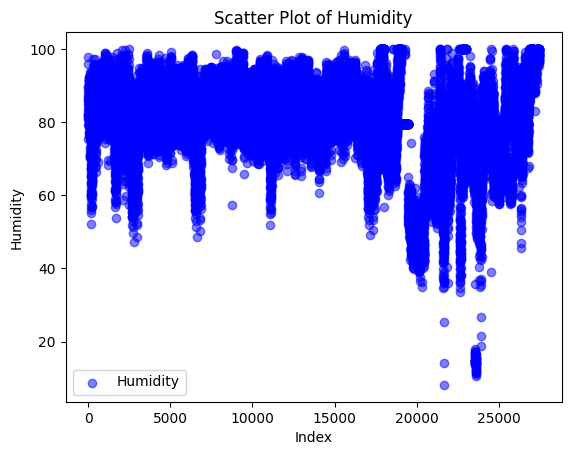

In [15]:
import matplotlib.pyplot as plt

# ใช้ index เป็นแกน X
x = df_combined.index  
y = df_combined["humidity"]

# วาด scatter plot      
plt.scatter(x, y, color="blue", alpha=0.5, label="Humidity")
plt.xlabel("Index")
plt.ylabel("Humidity")
plt.title("Scatter Plot of Humidity")
plt.legend()
plt.show()



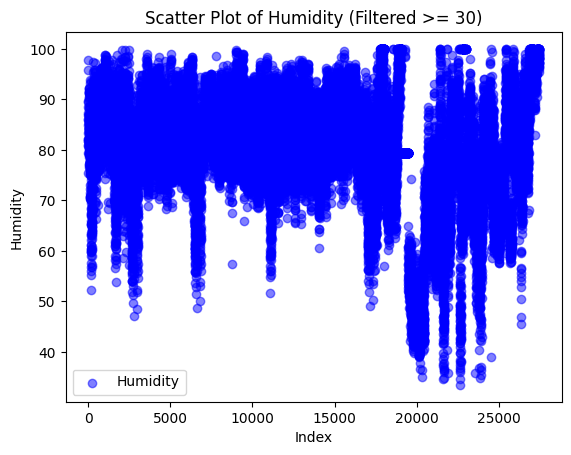

In [16]:
import matplotlib.pyplot as plt

# สร้าง DataFrame ชุดใหม่ ที่ humidity >= 30
df_filtered = df_combined[df_combined["humidity"] >= 30]

# สร้างตัวแปรสำหรับแกน X และ Y โดยใช้อินเด็กซ์และค่าคอลัมน์ humidity
x = df_filtered.index
y = df_filtered["humidity"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="Humidity")
plt.xlabel("Index")
plt.ylabel("Humidity")
plt.title("Scatter Plot of Humidity (Filtered >= 30)")
plt.legend()
plt.show()


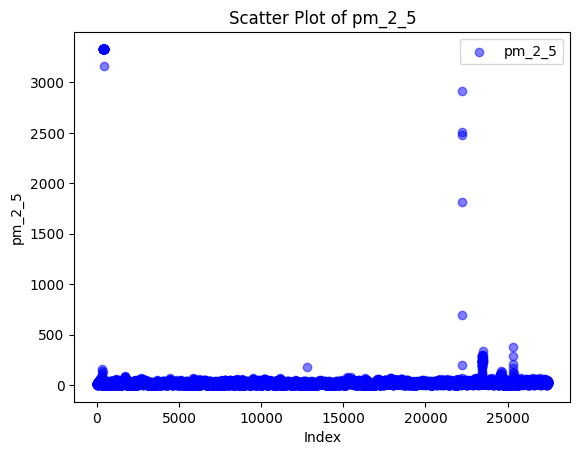

In [3]:
import matplotlib.pyplot as plt

# ใช้ index เป็นแกน X
x = df_combined.index  
y = df_combined["pm_2_5"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="pm_2_5")
plt.xlabel("Index")
plt.ylabel("pm_2_5")
plt.title("Scatter Plot of pm_2_5")
plt.legend()
plt.show()

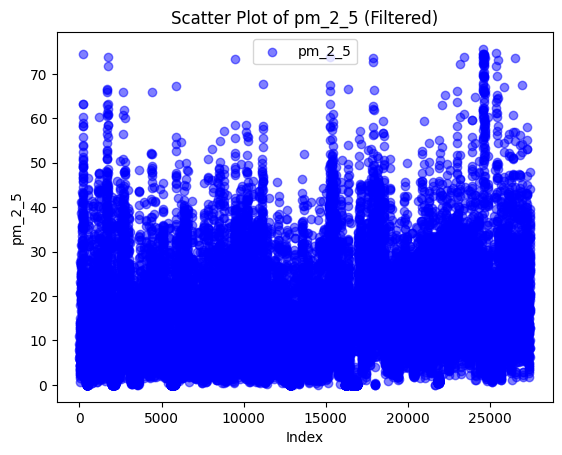

In [4]:
import matplotlib.pyplot as plt

# กรองเฉพาะค่าที่ pm_2_5 < 76
df_filtered = df_combined[df_combined["pm_2_5"] < 76]

# ใช้ index เป็นแกน X
x = df_filtered.index  
y = df_filtered["pm_2_5"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="pm_2_5")
plt.xlabel("Index")
plt.ylabel("pm_2_5")
plt.title("Scatter Plot of pm_2_5 (Filtered)")
plt.legend()
plt.show()


In [19]:
df_filtered

,timestamp,humidity,pm_2_5,temperature
0,2021-08-16 07:00:00.000,97.712066,5.979462,24.220945
1,2021-08-17 07:00:00.000,95.922874,9.142292,24.807743
2,2021-08-18 07:00:00.000,87.291672,7.901869,26.346601
3,2021-08-19 07:00:00.000,86.124131,10.989553,27.062054
4,2021-08-20 07:00:00.000,89.532874,8.201077,26.208938
...,...,...,...,...
27445,2025-02-08 07:00:00.000,97.108096,25.684798,26.560363
27446,2025-02-09 07:00:00.000,96.687594,20.455970,26.746786
27447,2025-02-10 07:00:00.000,97.279796,25.261628,26.531510
27448,2025-02-11 07:00:00.000,96.373096,27.361650,26.441329


<Axes: >

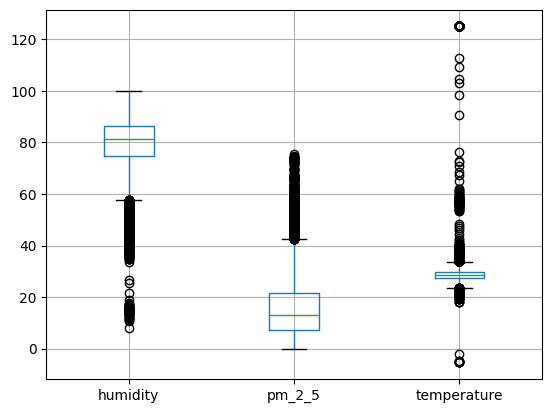

In [5]:
df_filtered.boxplot()

In [19]:
dfv2 = df_filtered.copy()
dfv2 = dfv2.drop(columns=['humidity','temperature',])
dfv2.index = pd.to_datetime(dfv2['timestamp'])
dfv2 = dfv2.drop(columns=['timestamp'])
dfv2



,pm_2_5
timestamp,
2021-08-16 07:00:00.000,5.979462
2021-08-17 07:00:00.000,9.142292
2021-08-18 07:00:00.000,7.901869
2021-08-19 07:00:00.000,10.989553
2021-08-20 07:00:00.000,8.201077
...,...
2025-02-08 07:00:00.000,25.684798
2025-02-09 07:00:00.000,20.455970
2025-02-10 07:00:00.000,25.261628


In [10]:
df_filtered.describe()

,timestamp,humidity,pm_2_5,temperature
count,27286,27286.000000,27286.000000,27286.000000
mean,2023-02-16 16:32:13.173651456,79.470614,15.503443,29.263237
min,2021-02-12 07:00:00,8.154764,0.000000,-5.390000
25%,2022-04-24 07:00:00,75.164159,7.299767,27.309121
50%,2022-12-14 07:00:00,81.126721,13.223339,28.569676
75%,2023-12-30 07:00:00,86.348995,21.380709,29.840110
max,2025-02-11 11:18:39.982000,100.000000,75.619846,124.997482
std,NaN,11.397352,11.272215,7.192437


In [11]:
from pycaret.time_series import *

In [12]:
# อ่านค่าก่อน clean
# df_filtered = pd.read_csv('model/Data/combined_data.csv', parse_dates=['timestamp'])
df_filtered.set_index('timestamp', inplace=True)
df_filtered = df_filtered.sort_index()


In [22]:
# ตรวจหาค่าซ้ำใน Index
duplicate_index = df_filtered.index[df_filtered.index.duplicated()]
print(duplicate_index)


Index(['2021-02-12 07:00:00', '2021-02-12 07:00:00', '2021-02-12 07:00:00',
       '2021-02-12 07:00:00', '2021-02-12 07:00:00', '2021-02-13 07:00:00',
       '2021-02-13 07:00:00', '2021-02-13 07:00:00', '2021-02-13 07:00:00',
       '2021-02-13 07:00:00',
       ...
       '2025-02-11 07:00:00.000', '2025-02-11 07:00:00.000',
       '2025-02-11 07:00:00.000', '2025-02-11 07:00:00.000',
       '2025-02-11 07:00:00.000', '2025-02-11 07:00:00.000',
       '2025-02-11 07:00:00.000', '2025-02-11 07:00:00.000',
       '2025-02-11 07:00:00.000', '2025-02-11 07:00:00.000'],
      dtype='object', name='timestamp', length=24534)


In [23]:
df_filtered = df_filtered[~df_filtered.index.duplicated(keep='first')]


In [24]:
# ตรวจหาค่าซ้ำใน Index
duplicate_index = df_filtered.index[df_filtered.index.duplicated()]
print(duplicate_index)

Index([], dtype='object', name='timestamp')


In [25]:
print(df_filtered.index.duplicated().sum())  # ค่าควรเป็น 0


0


In [26]:
#เช็ค Missing Value

print(df_filtered.isnull().sum())  # เช็กจำนวนค่าหายไปในแต่ละคอลัมน์


Unnamed: 0        0
timezone          0
humidity         54
pm_10           589
pm_2_5            0
temperature      48
pm_2_5_sp      2022
dtype: int64


In [27]:
print(df_filtered.isnull().sum()[df_filtered.isnull().sum() > 0])


humidity         54
pm_10           589
temperature      48
pm_2_5_sp      2022
dtype: int64


In [28]:
print(type(df_filtered))  # ควรเป็น pandas.DataFrame
print(df_filtered.index)  # ควรเป็น DatetimeIndex หรือ PeriodIndex
print(df_filtered.dtypes)  # ตรวจสอบประเภทข้อมูล


<class 'pandas.core.frame.DataFrame'>
Index(['2021-02-12 07:00:00', '2021-02-12 07:00:00.000', '2021-02-13 07:00:00',
       '2021-02-13 07:00:00.000', '2021-02-14 07:00:00',
       '2021-02-14 07:00:00.000', '2021-02-15 07:00:00',
       '2021-02-15 07:00:00.000', '2021-02-16 07:00:00',
       '2021-02-16 07:00:00.000',
       ...
       '2025-02-11 11:12:25.912', '2025-02-11 11:12:33.813',
       '2025-02-11 11:12:42.002', '2025-02-11 11:12:50.717',
       '2025-02-11 11:13:02.548', '2025-02-11 11:13:24.126',
       '2025-02-11 11:15:31.297', '2025-02-11 11:15:42.468',
       '2025-02-11 11:16:03.388', '2025-02-11 11:18:39.982'],
      dtype='object', name='timestamp', length=2916)
Unnamed: 0       int64
timezone        object
humidity       float64
pm_10          float64
pm_2_5         float64
temperature    float64
pm_2_5_sp      float64
dtype: object


In [29]:
df_filtered["pm_2_5"] = pd.to_numeric(df_filtered["pm_2_5"], errors="coerce")


In [30]:
print(df_filtered.dtypes)  # pm_2_5 ควรเป็น float หรือ int


Unnamed: 0       int64
timezone        object
humidity       float64
pm_10          float64
pm_2_5         float64
temperature    float64
pm_2_5_sp      float64
dtype: object


In [31]:
df_filtered = df_filtered.drop(columns=["Unnamed: 0", "timezone", "pm_10"], errors="ignore")



In [32]:
print(df_filtered.head())  # ตรวจสอบข้อมูล
print(df_filtered.columns)  # เช็คว่าคอลัมน์หายไปหรือยัง


                          humidity     pm_2_5  temperature  pm_2_5_sp
timestamp                                                            
2021-02-12 07:00:00      81.562758  30.894437    28.262199        NaN
2021-02-12 07:00:00.000  85.534242  14.697866    27.085040        NaN
2021-02-13 07:00:00      85.553445  11.906542    27.135950        NaN
2021-02-13 07:00:00.000  84.944157  12.407581    27.332436        NaN
2021-02-14 07:00:00      81.151037  23.226490    27.205131        NaN
Index(['humidity', 'pm_2_5', 'temperature', 'pm_2_5_sp'], dtype='object')


In [33]:
print(type(df_filtered))  # ควรเป็น pandas.DataFrame
print(df_filtered.index)  # ควรเป็น DatetimeIndex
print(df_filtered.dtypes)  # ตรวจสอบประเภทข้อมูลของแต่ละคอลัมน์


<class 'pandas.core.frame.DataFrame'>
Index(['2021-02-12 07:00:00', '2021-02-12 07:00:00.000', '2021-02-13 07:00:00',
       '2021-02-13 07:00:00.000', '2021-02-14 07:00:00',
       '2021-02-14 07:00:00.000', '2021-02-15 07:00:00',
       '2021-02-15 07:00:00.000', '2021-02-16 07:00:00',
       '2021-02-16 07:00:00.000',
       ...
       '2025-02-11 11:12:25.912', '2025-02-11 11:12:33.813',
       '2025-02-11 11:12:42.002', '2025-02-11 11:12:50.717',
       '2025-02-11 11:13:02.548', '2025-02-11 11:13:24.126',
       '2025-02-11 11:15:31.297', '2025-02-11 11:15:42.468',
       '2025-02-11 11:16:03.388', '2025-02-11 11:18:39.982'],
      dtype='object', name='timestamp', length=2916)
humidity       float64
pm_2_5         float64
temperature    float64
pm_2_5_sp      float64
dtype: object


In [34]:
print(df_filtered.index[:10])  # ดูค่า index 10 ตัวแรก
print(df_filtered.index.dtype)  # ดูประเภทข้อมูล


Index(['2021-02-12 07:00:00', '2021-02-12 07:00:00.000', '2021-02-13 07:00:00',
       '2021-02-13 07:00:00.000', '2021-02-14 07:00:00',
       '2021-02-14 07:00:00.000', '2021-02-15 07:00:00',
       '2021-02-15 07:00:00.000', '2021-02-16 07:00:00',
       '2021-02-16 07:00:00.000'],
      dtype='object', name='timestamp')
object


In [35]:
df_filtered.index = pd.to_datetime(df_filtered.index, errors="coerce", format="mixed")


In [36]:
print(df_filtered.index)


DatetimeIndex([       '2021-02-12 07:00:00',        '2021-02-12 07:00:00',
                      '2021-02-13 07:00:00',        '2021-02-13 07:00:00',
                      '2021-02-14 07:00:00',        '2021-02-14 07:00:00',
                      '2021-02-15 07:00:00',        '2021-02-15 07:00:00',
                      '2021-02-16 07:00:00',        '2021-02-16 07:00:00',
               ...
               '2025-02-11 11:12:25.912000', '2025-02-11 11:12:33.813000',
               '2025-02-11 11:12:42.002000', '2025-02-11 11:12:50.717000',
               '2025-02-11 11:13:02.548000', '2025-02-11 11:13:24.126000',
               '2025-02-11 11:15:31.297000', '2025-02-11 11:15:42.468000',
               '2025-02-11 11:16:03.388000', '2025-02-11 11:18:39.982000'],
              dtype='datetime64[ns]', name='timestamp', length=2916, freq=None)


In [37]:
df_filtered.index = pd.to_datetime(df_filtered.index)


In [38]:
print(df_filtered.index.duplicated().sum())  # ถ้า > 0 แสดงว่ามีค่าซ้ำ


1445


In [39]:
print(df_filtered.index[df_filtered.index.duplicated()])


DatetimeIndex(['2021-02-12 07:00:00', '2021-02-13 07:00:00',
               '2021-02-14 07:00:00', '2021-02-15 07:00:00',
               '2021-02-16 07:00:00', '2021-02-17 07:00:00',
               '2021-02-18 07:00:00', '2021-02-19 07:00:00',
               '2021-02-20 07:00:00', '2021-02-21 07:00:00',
               ...
               '2025-01-27 07:00:00', '2025-01-28 07:00:00',
               '2025-01-29 07:00:00', '2025-01-30 07:00:00',
               '2025-01-31 07:00:00', '2025-02-01 07:00:00',
               '2025-02-02 07:00:00', '2025-02-03 07:00:00',
               '2025-02-04 07:00:00', '2025-02-05 07:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=1445, freq=None)


In [40]:
df_filtered = df_filtered[~df_filtered.index.duplicated(keep='first')]


In [41]:
print(df_filtered.index.duplicated().sum())  # ค่าควรเป็น 0


0


In [42]:
print(df_filtered.index.freq)  # ค่าควรเป็น D, H, T หรือค่าความถี่ที่ชัดเจน


None


In [43]:
df_filtered = df_filtered.asfreq("D")  # กำหนดให้เป็นรายวัน (เปลี่ยนตามต้องการ)


In [44]:
print(df_filtered.index.freq)  # ควรเป็น D, H, T ตามที่กำหนด


<Day>


In [45]:
exp_setup = setup(
    data=df_filtered,
    target='pm_2_5',
    fh=7,
    fold=3,
    session_id=123,
    numeric_imputation_exogenous="mean"
)


,Description,Value
0,session_id,123
1,Target,pm_2_5
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1461, 4)"
5,Transformed data shape,"(1461, 4)"
6,Transformed train set shape,"(1454, 4)"
7,Transformed test set shape,"(7, 4)"
8,Rows with missing values,99.6%
9,Fold Generator,ExpandingWindowSplitter


In [46]:
from pycaret.time_series import models

print(models())


                                                              Name  \
ID                                                                   
arima                                                        ARIMA   
auto_arima                                              Auto ARIMA   
croston                                                    Croston   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
dt_cds_dt        Dec

In [47]:
from pycaret.time_series import models

print(models())


                                                              Name  \
ID                                                                   
arima                                                        ARIMA   
auto_arima                                              Auto ARIMA   
croston                                                    Croston   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending   
dt_cds_dt        Dec

In [48]:
# 3. สร้างโมเดลพื้นฐาน (Baseline) เพื่อเปรียบเทียบ เช่น ETS (Exponential Smoothing)
baseline_model = create_model("auto_arima")
print(baseline_model)


AutoARIMA(random_state=123, sp=10, suppress_warnings=True)


In [52]:
# 4. เปรียบเทียบโมเดลทั้งหมดและเลือกโมเดลที่ดีที่สุด
best_model = compare_models(sort='MASE')
print(best_model)      # แสดงโมเดลที่ดีที่สุดที่ถูกเลือก

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=HuberRegressor(), sp=10)


In [53]:
# 5. ปรับจูนโมเดลที่ดีที่สุดเพื่อเพิ่มความแม่นยำ
tuned_model = tune_model(best_model)
print(tuned_model)     # แสดงโมเดลหลังปรับจูน (หากมีการปรับพารามิเตอร์)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:56:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2025-01-14,0.7530,0.1043,14.1865,18.3800,0.6635,0.7503,-0.8724
1,2025-01-21,0.4587,0.0642,8.6365,11.2819,0.6066,0.8302,0.4853
2,2025-01-28,0.8024,0.1033,15.0672,18.1208,0.5342,0.7440,-5.0933
Mean,NaT,0.6714,0.0906,12.6300,15.9276,0.6015,0.7748,-1.8268
SD,NaT,0.1517,0.0187,2.8467,3.2867,0.0529,0.0392,2.3753


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.8s finished


BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=HuberRegressor(), sp=10)


In [54]:
# 6. ประเมินโมเดลด้วยกราฟ (ถ้าต้องการดูการวิเคราะห์โมเดล)
plot_model(tuned_model, plot='diagnostics')  # กราฟตรวจสอบค่าคลาดเคลื่อนของโมเดล
plot_model(tuned_model, plot='forecast')     # กราฟการพยากรณ์เทียบกับค่าจริงที่ผ่านมา

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.
In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [55]:
# 7. พยากรณ์ค่า PM2.5 ใน 7 วันข้างหน้า
future_forecast = predict_model(tuned_model)
print(future_forecast.tail(7))  # แสดงค่าพยากรณ์ 7 วันสุดท้าย (อนาคต) พร้อมวันที่

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,HuberRegressor,0.5660,0.0799,10.6159,13.9715,0.7254,0.9480,0.3008


             y_pred
2025-02-05  17.9268
2025-02-06  -4.3868
2025-02-07  -8.7139
2025-02-08  80.6323
2025-02-09  -0.6943
2025-02-10  12.3753
2025-02-11  28.6146
